In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [57]:
raw_data =  pd.read_excel('소프트맥스.xlsx')
raw_data

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),time_0,time_1,power_cat
0,1,2020-06-01 00,8179.056,17.6,2.5,92,0.8,0.0,1,0,0
1,1,2020-06-01 01,8135.640,17.7,2.9,91,0.3,0.0,1,0,0
2,1,2020-06-01 02,8107.128,17.5,3.2,91,0.0,0.0,1,0,0
3,1,2020-06-01 03,8048.808,17.1,3.2,91,0.0,0.0,1,0,0
4,1,2020-06-01 04,8043.624,17.0,3.3,92,0.0,0.0,1,0,0
5,1,2020-06-01 05,8010.576,16.9,3.4,93,0.0,0.0,1,0,0
6,1,2020-06-01 06,7978.176,16.7,3.4,90,0.1,0.0,1,0,0
7,1,2020-06-01 07,8019.000,16.9,2.3,86,0.0,0.1,1,0,0
8,1,2020-06-01 08,8020.944,17.8,3.3,80,0.0,0.3,0,1,0
9,1,2020-06-01 09,8083.152,19.3,2.1,73,0.0,0.7,0,1,0


In [58]:
raw_data = raw_data.drop('num',axis=1)
raw_data = raw_data.drop('전력사용량(kWh)',axis=1)
raw_data = raw_data.drop('date_time',axis=1)

In [59]:
raw_data = raw_data.reset_index()
raw_data = raw_data.drop(['index'], axis=1)
raw_data

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),time_0,time_1,power_cat
0,17.6,2.5,92,0.8,0.0,1,0,0
1,17.7,2.9,91,0.3,0.0,1,0,0
2,17.5,3.2,91,0.0,0.0,1,0,0
3,17.1,3.2,91,0.0,0.0,1,0,0
4,17.0,3.3,92,0.0,0.0,1,0,0
5,16.9,3.4,93,0.0,0.0,1,0,0
6,16.7,3.4,90,0.1,0.0,1,0,0
7,16.9,2.3,86,0.0,0.1,1,0,0
8,17.8,3.3,80,0.0,0.3,0,1,0
9,19.3,2.1,73,0.0,0.7,0,1,0


In [60]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 8 columns):
기온(°C)       2040 non-null float64
풍속(m/s)      2040 non-null float64
습도(%)        2040 non-null int64
강수량(mm)      2040 non-null float64
일조(hr)       2040 non-null float64
time_0       2040 non-null int64
time_1       2040 non-null int64
power_cat    2040 non-null int64
dtypes: float64(4), int64(4)
memory usage: 127.6 KB


In [61]:
# raw_data.to_numpy()
raw_data1 = raw_data.values
raw_data1[0]

array([17.6,  2.5, 92. ,  0.8,  0. ,  1. ,  0. ,  0. ])

In [62]:
import tensorflow as tf
import numpy as np

In [63]:
# xy = np.loadtxt('../data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = raw_data1[:, 0:-1]
y_data = raw_data1[:, [-1]]

In [64]:
print(x_data.shape, x_data, len(x_data))

(2040, 7) [[17.6  2.5 92.  ...  0.   1.   0. ]
 [17.7  2.9 91.  ...  0.   1.   0. ]
 [17.5  3.2 91.  ...  0.   1.   0. ]
 ...
 [28.3  1.1 71.  ...  0.   0.   1. ]
 [28.3  2.4 72.  ...  0.   0.   1. ]
 [28.1  2.3 73.  ...  0.   0.   1. ]] 2040


In [65]:
print(y_data.shape, x_data[1], len(y_data))

(2040, 1) [17.7  2.9 91.   0.3  0.   1.   0. ] 2040


In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
x_data = MinMaxScaler().fit_transform(x_data)

In [68]:
print(x_data)

[[0.1372549  0.3164557  0.89041096 ... 0.         1.         0.        ]
 [0.14215686 0.36708861 0.87671233 ... 0.         1.         0.        ]
 [0.13235294 0.40506329 0.87671233 ... 0.         1.         0.        ]
 ...
 [0.66176471 0.13924051 0.60273973 ... 0.         0.         1.        ]
 [0.66176471 0.30379747 0.61643836 ... 0.         0.         1.        ]
 [0.65196078 0.29113924 0.63013699 ... 0.         0.         1.        ]]


In [69]:
y_data

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [2.]])

In [70]:
nb_classes = 3
y_one_hot = tf.keras.utils.to_categorical(y_data, nb_classes)
print("one_hot:", y_one_hot)

one_hot: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [71]:
tf.model = tf.keras.Sequential()
# # Sequential()객체에 추가적으로 입력 할때
# 입력층과 출력층(units)
tf.model.add(tf.keras.layers.Dense(units=nb_classes, input_dim=7, activation='softmax'))
# sgd는 momentum, 아담 등을 통해서 가능
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])
tf.model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 24        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [72]:
# 주어진 전체 데이터를 훈련하는 횟수
history = tf.model.fit(x_data, y_one_hot, epochs=50)
# epoch에 따른 loss와 accuracy변화를 나타내는 손실함수 그려보기
# plt.plot(history.history['loss'])

Epoch 1/50
64/64 [==============================] - ETA: 14s - loss: 1.2932 - accuracy: 0.187 - 0s 653us/step - loss: 1.1216 - accuracy: 0.3500
Epoch 2/50
64/64 [==============================] - ETA: 0s - loss: 1.0309 - accuracy: 0.46 - 0s 651us/step - loss: 1.0281 - accuracy: 0.4686
Epoch 3/50
64/64 [==============================] - ETA: 0s - loss: 0.9811 - accuracy: 0.53 - 0s 619us/step - loss: 1.0055 - accuracy: 0.4667
Epoch 4/50
64/64 [==============================] - ETA: 0s - loss: 0.9882 - accuracy: 0.50 - 0s 635us/step - loss: 0.9905 - accuracy: 0.4887
Epoch 5/50
64/64 [==============================] - ETA: 0s - loss: 0.9836 - accuracy: 0.59 - 0s 572us/step - loss: 0.9765 - accuracy: 0.5093
Epoch 6/50
64/64 [==============================] - ETA: 0s - loss: 0.8306 - accuracy: 0.65 - 0s 603us/step - loss: 0.9642 - accuracy: 0.4882
Epoch 7/50
64/64 [==============================] - ETA: 0s - loss: 0.9598 - accuracy: 0.46 - 0s 603us/step - loss: 0.9542 - accuracy: 0.5103
Epoc

In [73]:
tf.model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 24        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


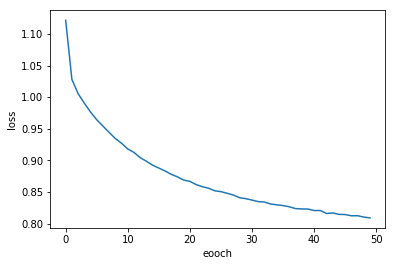

In [74]:
plt.plot(history.history['loss'])
plt.xlabel('eooch')
plt.ylabel('loss')
plt.show()

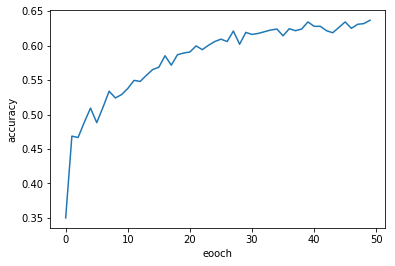

In [75]:
plt.plot(history.history['accuracy'])
plt.xlabel('eooch')
plt.ylabel('accuracy')
plt.show()

In [76]:
# 예측하는 것
pred = tf.model.predict_classes(x_data)
# flatten(): 1차원 벡터로 만드는 것
for p, y in zip(pred, y_data.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
    
# Calculate the accuracy
print("Accuracy: ", tf.model.evaluate(x_data, y_one_hot)[1])    

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] P

[True] Prediction: 2 True Y: 2
[False] Prediction: 2 True Y: 1
[False] Prediction: 1 True Y: 2
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 1 True Y: 1
[False] Prediction: 2 True Y: 1
[False] Prediction: 2 True Y: 1
[False] Prediction: 2 True Y: 1
[False] Prediction: 2 True Y: 1
[True] Prediction: 2 True Y: 2
[False] Prediction: 2 True Y: 1
[True] Prediction: 2 True Y: 2
[False] Prediction: 2 True Y: 1
[False] Prediction: 2 True Y: 1
[False] Prediction: 2 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 0 True Y: 1
[False] Prediction: 0 True Y: 1
[False] Prediction: 0 True Y: 1
[False] Prediction: 0 T

[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 0 True Y: 1
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False

[True] Prediction: 2 True Y: 2
[False] Prediction: 2 True Y: 1
[True] Prediction: 2 True Y: 2
[False] Prediction: 2 True Y: 1
[False] Prediction: 2 True Y: 1
[False] Prediction: 2 True Y: 1
[False] Prediction: 2 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 2 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 1 True Y

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 0 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0


[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 2 True Y: 0
[False] Prediction: 2 True Y: 0
[False] Prediction: 2 True Y: 0
[False] Prediction: 2 True Y: 0
[False] Prediction: 2 True Y: 0
[False] Prediction: 2 True Y: 0
[False] Prediction: 2 True Y: 0
[False] Prediction: 2 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 1 True Y: 0
[False] Prediction: 2

[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 2 True Y: 1
[False] Prediction: 2 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
[False] Prediction: 0 True Y: 2
[False] Prediction: 2 True Y: 1
[False] Prediction: 2 True Y: 1
[True] Prediction: 0 True Y: 0
[False] Prediction: 0 True Y: 1
[False] Prediction: 2 True Y: 1
[True] Prediction: 2 True Y: 2
[

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

